In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from tqdm import tqdm
from scipy.stats import norm

sns.set()

# Exp Params

# Load & Prepare Data
In this particular analysis we only care about data at the national assembly level

In [129]:
folder_name = "exp2a"
file_postfix = ""

data_path = f"data/{folder_name}"
figs_path = f"figs/{folder_name}"
data_path, figs_path

('data/exp2a', 'figs/exp2a')

## Load

In [130]:
NROWS = None

### Amended Formula

In [131]:
amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", nrows=10)
amend_df.columns

Index(['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
       'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
       'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc',
       'abs_diff_seats', 'abs_diff_perc', 'max_diff_seats', 'mean_diff_seats',
       'min_diff_seats', 'max_diff_perc', 'mean_diff_perc', 'min_diff_perc',
       'tot_party_seats', 'tot_party_votes', 'tot_forf_seats',
       'tot_forf_votes', 'tot_ind_seats', 'tot_ind_votes', 'tot_seats',
       'tot_votes'],
      dtype='object')

In [132]:
cols = ["index", "votes", "seats", "diff_seats", "is_ind", "is_forfeit", "tot_seats"]

amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", usecols=cols, nrows=NROWS)
print(f"Shape: {amend_df.shape}")
amend_df.head()

Shape: (1023000, 7)


,index,seats,is_ind,is_forfeit,votes,diff_seats,tot_seats
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,166|2|2|3|2|2|2|2|2|3|1|2|2|2|2|2|2|2|2|1|159|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,8437486|136036|117844|166004|132404|95052|1163...,0.04161514306059644|0.6770577346855915|0.31905...,400
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|3|2|2|2|3|2|2|2|2|1|4|4|2|2|328|2|1|2|1|2|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,99824|110100|126934|81910|102002|102062|113580...,0.28405689072983975|0.5191803941873232|-0.0956...,400
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|193|1|1|1|2|1|1|1|1|1|1|1|1|1|1|1|1|2|1|1|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,140844|119858|9331530|60472|69894|58662|84018|...,0.9066495290299161|0.4735537136865444|-0.42177...,400
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,16|12|27|9|15|23|21|10|11|10|20|12|10|9|10|13|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,754172|534728|1254014|388726|671554|1042498|98...,0.47369035956258543|-0.3197155309555626|0.3919...,400
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,138|2|86|128|1|1|1|1|1|1|1|1|1|1|1|0|1|0|1|1|1...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,7231062|105736|4545028|6713906|57042|66920|726...,-0.13134796158757922|0.015980473121870453|0.65...,400


### Original Formula

In [133]:
cols = ["party", "votes", "seats", "diff_seats", "is_forfeit"]
orig_df = pd.read_csv(f"{data_path}/nat_orig{file_postfix}.csv", nrows=NROWS, usecols=cols)
orig_df.head()
# amend_df.head()
# drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
#              "mean_diff_perc", "min_diff_perc"]
# cols = set(orig_df.columns) - set(drop_cols)
# cols = list(cols)
# cols

,party,votes,seats,is_forfeit,diff_seats
0,party_2|party_16|party_5|party_12|party_11|par...,4218743|68018|58922|83002|66202|47526|58164|37...,170|3|2|3|2|2|2|2|2|3|1|2|2|2|2|2|2|2|2|162|1|...,False|False|False|False|False|False|False|Fals...,-0.5697804662647172|-0.2683084339942945|0.3663...
1,party_23|party_14|party_8|party_29|party_1|par...,49912|55050|63467|40955|7149084|51001|90499|51...,2|3|3|2|338|2|4|2|3|2|2|2|2|1|4|2|2|2|1|2|1|2|...,False|False|False|False|False|False|False|Fals...,0.35469782549468043|-0.4029068101161615|-0.005...
2,party_21|party_3|party_28|party_40|party_6|par...,70422|59929|30236|34947|29331|42009|3577947|19...,3|2|1|1|1|2|151|1|1|1|1|1|1|1|1|1|1|1|1|2|1|1|...,False|False|False|False|False|False|False|Fals...,-0.026445494598551278|0.5304897326716569|0.276...
3,party_6|party_17|party_7|party_11|party_26|par...,377086|267364|627007|492181|521249|194363|3357...,17|12|28|22|23|9|15|10|12|11|20|10|9|12|10|13|...,False|False|False|False|False|False|False|Fals...,-0.23288513021620005|-0.11166975160871573|-0.1...
4,party_2|party_29|party_8|party_34|party_11|par...,3356953|52868|28521|33460|36327|2272514|25449|...,131|2|1|1|1|88|1|1|1|1|1|1|1|1|0|1|0|1|1|1|1|1...,False|False|False|False|False|False|False|Fals...,-0.04504531214098506|0.062384115725698575|0.11...


In [134]:
amend_df["tot_seats"].describe()

count    1023000.0
mean         400.0
std            0.0
min          400.0
25%          400.0
50%          400.0
75%          400.0
max          400.0
Name: tot_seats, dtype: float64

# Prepare Data

In [135]:
{key: val for key, val in {"a": 0, "b":0, "c": 1}.items() if val != 0}

{'c': 1}

In [136]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items() if type(val) == str and "|" in val}
    df = pd.DataFrame.from_dict(df_dict)
    df.rename({"index": "party"}, axis=1, inplace=True)
    df.set_index("party", inplace=True)
    return df

In [137]:
bool_map = {
    "True": True,
    "False": False
}

In [138]:
df = row_to_df(amend_df.iloc[1])
df["votes"] = df["votes"].astype(int)
df["seats"] = df["seats"].astype(int)
df["is_ind"] = df["is_ind"].astype(bool)
df.head()

,seats,is_ind,is_forfeit,votes,diff_seats
party,,,,,
0,2,True,False,99824,0.28405689072983975
1,2,True,False,110100,0.5191803941873232
2,3,True,False,126934,-0.09564355898479837
3,2,True,False,81910,-0.12583046241704232
4,2,True,False,102002,0.333891358473164


### Ammended

In [139]:
amend_cols = ["votes", "seats", "is_ind", "is_forfeit"]
amend_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str",
    "is_ind": "str"
}

#### Only Parties

I.e. inter-party proportionality

In [140]:
def prep_amend_p(df):
    p_df = df[amend_cols].astype(amend_type_dict)
    p_df["is_forfeit"] = p_df["is_forfeit"].map(bool_map)
    p_df["is_ind"] = p_df["is_ind"].map(bool_map)
    p_df = p_df[p_df["is_ind"]==False]
    
    # print(p_df.info())
    
    # All Cands
    tot_votes = p_df["votes"].sum()
    tot_seats = p_df["seats"].sum()
    
    p_df["vote_perc"] = p_df["votes"]/tot_votes
    p_df["seat_perc"] = p_df["seats"]/tot_seats
    
    p_df["opt_seats"] = p_df["vote_perc"] * tot_seats
    p_df["seat_diff"] = p_df["opt_seats"] - p_df["seats"]
    
    return p_df

In [141]:
tmp = row_to_df(amend_df.iloc[0])
ex_amend_p_df = prep_amend_p(tmp)
ex_amend_p_df

,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,,
0,8437486,166,False,False,0.423576,0.423469,166.041615,0.041615
1,136036,2,False,False,0.006829,0.005102,2.677058,0.677058
2,117844,2,False,False,0.005916,0.005102,2.319057,0.319057
3,166004,3,False,False,0.008334,0.007653,3.266799,0.266799
4,132404,2,False,False,0.006647,0.005102,2.605583,0.605583
5,95052,2,False,False,0.004772,0.005102,1.870532,-0.129468
6,116328,2,False,False,0.005840,0.005102,2.289223,0.289223
7,74118,2,False,False,0.003721,0.005102,1.458571,-0.541429
8,102964,2,False,False,0.005169,0.005102,2.026233,0.026233


### Original

In [142]:
orig_cols = ["votes", "seats", "is_forfeit"]
orig_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str"
}

In [143]:
def prep_orig(df):
    df = df[orig_cols].astype(orig_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

In [144]:
tmp = row_to_df(orig_df.iloc[0])
ex_orig_df = prep_orig(tmp)
ex_orig_df

,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,
party_2,4218743,170,False,0.423576,0.4250,169.430220,-0.569780
party_16,68018,3,False,0.006829,0.0075,2.731692,-0.268308
party_5,58922,2,False,0.005916,0.0050,2.366384,0.366384
party_12,83002,3,False,0.008334,0.0075,3.333469,0.333469
party_11,66202,2,False,0.006647,0.0050,2.658759,0.658759
party_18,47526,2,False,0.004772,0.0050,1.908706,-0.091294
party_13,58164,2,False,0.005840,0.0050,2.335942,0.335942
party_24,37059,2,False,0.003721,0.0050,1.488338,-0.511662
party_34,51482,2,False,0.005169,0.0050,2.067584,0.067584


In [145]:
tot_orig_votes = ex_orig_df["votes"].sum()
tot_orig_votes

9959836

## Combine DFs

### Amended

#### Only Parties

In [146]:
n_rows = amend_df.shape[0]
dfs_arr = [prep_amend_p(row_to_df(amend_df.iloc[i])).reset_index() for i in range(n_rows)]
all_amend_p_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_p_df.shape}")
all_amend_p_df.head()

Shape: (40923669, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,8437486,166,False,False,0.423576,0.423469,166.041615,0.041615
1,1,136036,2,False,False,0.006829,0.005102,2.677058,0.677058
2,2,117844,2,False,False,0.005916,0.005102,2.319057,0.319057
3,3,166004,3,False,False,0.008334,0.007653,3.266799,0.266799
4,4,132404,2,False,False,0.006647,0.005102,2.605583,0.605583


### Original

In [147]:
n_rows = orig_df.shape[0]
dfs_arr = [prep_orig(row_to_df(orig_df.iloc[i])).reset_index() for i in range(n_rows)]
all_orig_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_orig_df.shape}")
all_orig_df.head()

Shape: (40923669, 8)


,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_2,4218743,170,False,0.423576,0.4250,169.430220,-0.569780
1,party_16,68018,3,False,0.006829,0.0075,2.731692,-0.268308
2,party_5,58922,2,False,0.005916,0.0050,2.366384,0.366384
3,party_12,83002,3,False,0.008334,0.0075,3.333469,0.333469
4,party_11,66202,2,False,0.006647,0.0050,2.658759,0.658759


# Analysis

## Common Fuctions

In [148]:
def calc_stats(x):
    stats = {
        "min": x.min(),
        "mean": x.mean(),
        "max": x.max()
    }
    return stats

## Inter-Party Proportionality
Optimal seats for amended formula is only calculated using parties 

#### All

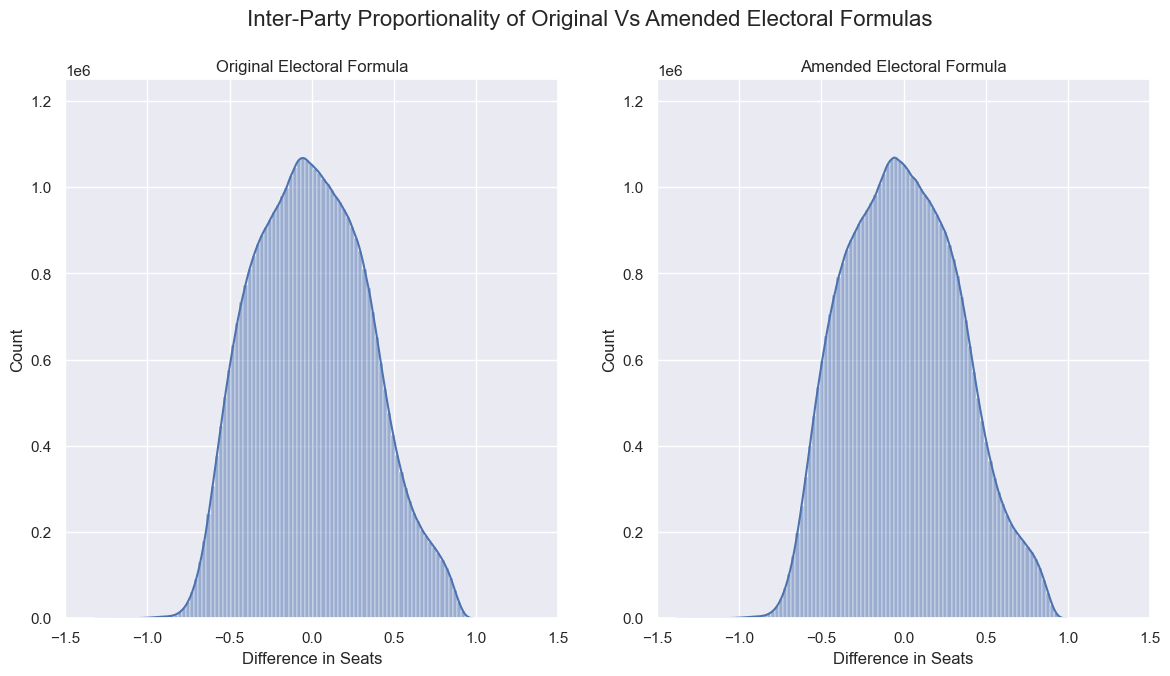

In [172]:
y_max = 1250000

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, y_max)

axs[0].set_xlabel("Difference in Seats")
axs[1].set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop.png")

In [160]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.314, mean: -0.0, max: 0.983
Ammended:
	 min: -1.382, mean: -0.0, max: 0.992


In [169]:
x1 = orig_all_data["seat_diff"]
mu1, std1 = norm.fit(x1)
mu1, std1

(-5.620067980252392e-19, 0.3431151047167441)

In [170]:
x2 = amend_all_data["seat_diff"]
mu2, std2 = norm.fit(x2)
mu2, std2

(-3.087157925337039e-19, 0.3445438218825584)

In [171]:
print(f"Difference: ")
print(f"\t mu = {round(mu1 - mu2, 4)}")
print(f"\t std = {round(std1 - std2, 4)}")

Difference: 
	 mu = -0.0
	 std = -0.0014
